In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
pd.set_option('display.max.columns', 50) 
from datetime import datetime

In [5]:
from datetime import datetime

tmp = pd.read_csv(r'C:\Users\정선효\Documents\카카오톡 받은 파일\prep_unlabelled_ERR_minmax.csv', index_col=0)
df_time = tmp['TimeStamp'].apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
tmp.drop(columns=['TimeStamp'])
tmp['TimeStamp'] = df_time
tmp = tmp.set_index('TimeStamp')
tmp

,ERR_FACT_QTY
TimeStamp,
2020-01-29 03:12:08,0.083916
2020-01-29 03:12:46,0.083916
2020-01-29 03:13:25,0.083916
2020-01-29 03:14:05,0.083916
2020-01-29 03:14:44,0.083916
...,...
2020-09-10 04:05:58,0.090909
2020-09-10 04:54:21,0.090909
2020-09-10 05:39:31,0.090909


In [6]:
tmp.shape

(40647, 1)

<AxesSubplot:xlabel='TimeStamp'>

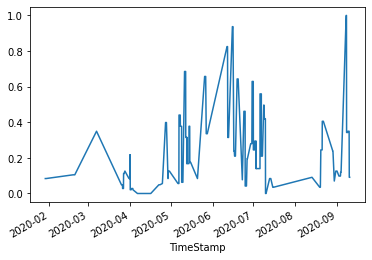

In [10]:
tmp['ERR_FACT_QTY'].plot()

In [11]:
tmp.shape

(40647, 1)

In [17]:
tmp

,ERR_FACT_QTY
TimeStamp,
2020-01-29 03:12:08,0.083916
2020-01-29 03:12:46,0.083916
2020-01-29 03:13:25,0.083916
2020-01-29 03:14:05,0.083916
2020-01-29 03:14:44,0.083916
...,...
2020-09-10 04:05:58,0.090909
2020-09-10 04:54:21,0.090909
2020-09-10 05:39:31,0.090909


In [21]:
tmp.head()

,ERR_FACT_QTY
TimeStamp,
2020-01-29 03:12:08,0.083916
2020-01-29 03:12:46,0.083916
2020-01-29 03:13:25,0.083916
2020-01-29 03:14:05,0.083916
2020-01-29 03:14:44,0.083916


In [22]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40647 entries, 2020-01-29 03:12:08 to 2020-09-10 07:56:05
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ERR_FACT_QTY  40647 non-null  float64
dtypes: float64(1)
memory usage: 635.1 KB


In [23]:
tmp.count()*0.6

ERR_FACT_QTY    24388.2
dtype: float64

<AxesSubplot:xlabel='TimeStamp'>

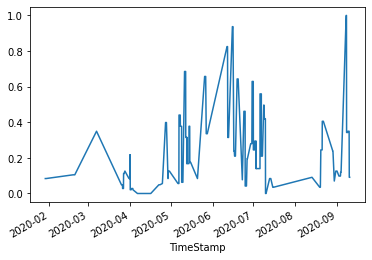

In [24]:
tmp['ERR_FACT_QTY'].plot()

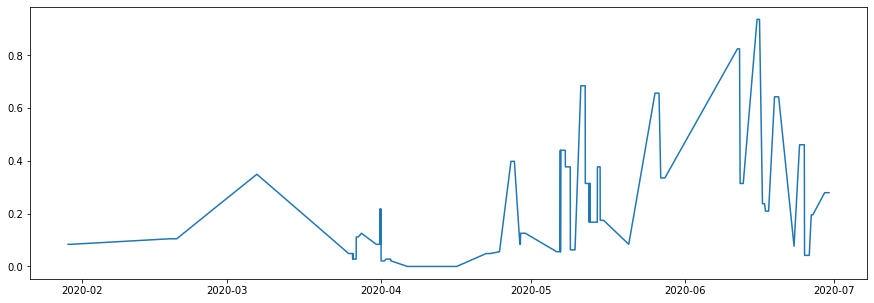

                     ERR_FACT_QTY
TimeStamp                        
2020-01-29 03:12:08      0.083916
2020-01-29 03:12:46      0.083916
2020-01-29 03:13:25      0.083916
2020-01-29 03:14:05      0.083916
2020-01-29 03:14:44      0.083916
2020-01-29 03:15:23      0.083916
2020-01-29 03:16:02      0.083916
2020-01-29 03:16:42      0.083916
2020-01-29 03:17:21      0.083916
2020-01-29 03:18:00      0.083916


In [25]:
plt.figure(figsize=(15, 5))
plt.plot(tmp[:28452])
plt.show()
print(tmp[:10])

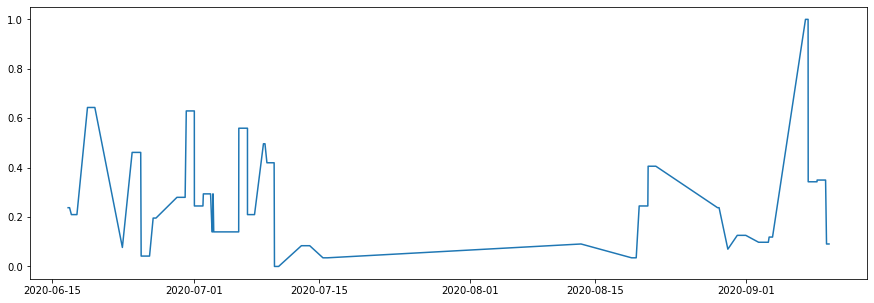

                     ERR_FACT_QTY
TimeStamp                        
2020-01-29 03:12:08      0.083916
2020-01-29 03:12:46      0.083916
2020-01-29 03:13:25      0.083916
2020-01-29 03:14:05      0.083916
2020-01-29 03:14:44      0.083916
2020-01-29 03:15:23      0.083916
2020-01-29 03:16:02      0.083916
2020-01-29 03:16:42      0.083916
2020-01-29 03:17:21      0.083916
2020-01-29 03:18:00      0.083916


In [26]:
plt.figure(figsize=(15, 5))
plt.plot(tmp[24388:])
plt.show()
print(tmp[:10])

In [27]:
tmp.shape

(40647, 1)

In [28]:
train = tmp.iloc[:24388]
test = tmp.iloc[24388:]

In [29]:
train

,ERR_FACT_QTY
TimeStamp,
2020-01-29 03:12:08,0.083916
2020-01-29 03:12:46,0.083916
2020-01-29 03:13:25,0.083916
2020-01-29 03:14:05,0.083916
2020-01-29 03:14:44,0.083916
...,...
2020-06-16 19:44:12,0.237762
2020-06-16 19:44:50,0.237762
2020-06-16 19:45:29,0.237762


In [30]:
print(f"max {tmp['ERR_FACT_QTY'].max()}, min {tmp['ERR_FACT_QTY'].min()}")
#정규화를 거쳤기 때문

max 1.0, min 0.0


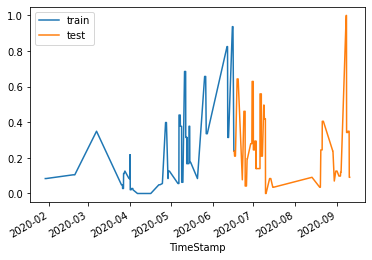

In [31]:
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [32]:
for s in range(1,21): #window size 20
    train['shift_{}'.format(s)] = train['ERR_FACT_QTY'].shift(s)
    test['shift_{}'.format(s)] = test['ERR_FACT_QTY'].shift(s)
    
train.head(23)

C:\Users\정선효\AppData\Local\Temp/ipykernel_5372/3255352681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['shift_{}'.format(s)] = train['ERR_FACT_QTY'].shift(s)
C:\Users\정선효\AppData\Local\Temp/ipykernel_5372/3255352681.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['shift_{}'.format(s)] = test['ERR_FACT_QTY'].shift(s)


,ERR_FACT_QTY,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12,shift_13,shift_14,shift_15,shift_16,shift_17,shift_18,shift_19,shift_20
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2020-01-29 03:12:08,0.083916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-29 03:12:46,0.083916,0.083916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-29 03:13:25,0.083916,0.083916,0.083916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-29 03:14:05,0.083916,0.083916,0.083916,0.083916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-29 03:14:44,0.083916,0.083916,0.083916,0.083916,0.083916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-29 03:15:23,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-29 03:16:02,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-29 03:16:42,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-29 03:17:21,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
train.head()

,ERR_FACT_QTY,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12,shift_13,shift_14,shift_15,shift_16,shift_17,shift_18,shift_19,shift_20
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2020-01-29 03:12:08,0.083916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-29 03:12:46,0.083916,0.083916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-29 03:13:25,0.083916,0.083916,0.083916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-29 03:14:05,0.083916,0.083916,0.083916,0.083916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-29 03:14:44,0.083916,0.083916,0.083916,0.083916,0.083916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
x_train =train.dropna().drop('ERR_FACT_QTY', axis = 1)
y_train = train.dropna()[['ERR_FACT_QTY']]

x_test = test.dropna().drop('ERR_FACT_QTY',axis = 1)
y_test = test.dropna()[['ERR_FACT_QTY']]

x_train.head()

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12,shift_13,shift_14,shift_15,shift_16,shift_17,shift_18,shift_19,shift_20
TimeStamp,,,,,,,,,,,,,,,,,,,,
2020-01-29 03:25:11,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916
2020-01-29 03:25:50,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916
2020-01-29 03:26:29,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916
2020-01-29 03:27:09,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916
2020-01-29 03:27:48,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916,0.083916


In [35]:
y_train.head()

,ERR_FACT_QTY
TimeStamp,
2020-01-29 03:25:11,0.083916
2020-01-29 03:25:50,0.083916
2020-01-29 03:26:29,0.083916
2020-01-29 03:27:09,0.083916
2020-01-29 03:27:48,0.083916


In [36]:
print(type(x_train))
x_train = x_train.values
print(type(x_train))
x_test= x_test.values

y_train = y_train.values
y_test = y_test.values
print(x_train.shape)
print(y_train.shape)
# dataframe 타입이었던 데이터들을 values를 사용해 numpy 표현형만 가져온다.
#기계학습 패키지들은 일반적으로 데이터로 numpy의 ndarray타입을 지원한다.

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(24368, 20)
(24368, 1)


In [37]:
print(x_train.ndim, y_train.ndim, x_test.ndim, y_test.ndim)

2 2 2 2


In [38]:
x_train.shape # (행, 열)

(24368, 20)

In [39]:
x_train_t = x_train.reshape(x_train.shape[0],20,1)
x_test_t = x_test.reshape(x_test.shape[0],20,1)

print('최종 data')
print(x_train_t.shape)
print(x_train_t)
print(y_train)

최종 data
(24368, 20, 1)
[[[0.08391608]
  [0.08391608]
  [0.08391608]
  ...
  [0.08391608]
  [0.08391608]
  [0.08391608]]

 [[0.08391608]
  [0.08391608]
  [0.08391608]
  ...
  [0.08391608]
  [0.08391608]
  [0.08391608]]

 [[0.08391608]
  [0.08391608]
  [0.08391608]
  ...
  [0.08391608]
  [0.08391608]
  [0.08391608]]

 ...

 [[0.23776224]
  [0.23776224]
  [0.23776224]
  ...
  [0.23776224]
  [0.23776224]
  [0.23776224]]

 [[0.23776224]
  [0.23776224]
  [0.23776224]
  ...
  [0.23776224]
  [0.23776224]
  [0.23776224]]

 [[0.23776224]
  [0.23776224]
  [0.23776224]
  ...
  [0.23776224]
  [0.23776224]
  [0.23776224]]]
[[0.08391608]
 [0.08391608]
 [0.08391608]
 ...
 [0.23776224]
 [0.23776224]
 [0.23776224]]


In [40]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping

K.clear_session()

model = Sequential()
model.add(LSTM(20, input_shape = (20,1))) #20개 메모리 셀을 가진 LSTM 레이어 하나
model.add(Dense(1)) #출력층
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics=['accuracy'])
model.summary()

#metrics 제거

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20)                1760      
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


In [41]:
early_stop = EarlyStopping(monitor = 'loss', verbose = 1, patience=15, min_delta =0.000001, )
#원래 patience=1에서 변경함 교수님 모델 적용
kl = model.fit(x_train, y_train, epochs = 100, batch_size = 30, verbose = 1, callbacks = [early_stop])


Epoch 1/100
813/813 [==============================] - 4s 4ms/step - loss: 0.0033 - accuracy: 0.0997
Epoch 2/100
813/813 [==============================] - 3s 4ms/step - loss: 9.0284e-04 - accuracy: 0.0997
Epoch 3/100
813/813 [==============================] - 3s 4ms/step - loss: 6.5981e-04 - accuracy: 0.0997
Epoch 4/100
813/813 [==============================] - 3s 4ms/step - loss: 6.0991e-04 - accuracy: 0.0997
Epoch 5/100
813/813 [==============================] - 3s 4ms/step - loss: 5.8474e-04 - accuracy: 0.0997
Epoch 6/100
813/813 [==============================] - 3s 4ms/step - loss: 5.3848e-04 - accuracy: 0.0997
Epoch 7/100
813/813 [==============================] - 3s 4ms/step - loss: 5.1151e-04 - accuracy: 0.0997
Epoch 8/100
813/813 [==============================] - 3s 4ms/step - loss: 5.3387e-04 - accuracy: 0.0997
Epoch 9/100
813/813 [==============================] - 3s 4ms/step - loss: 5.2392e-04 - accuracy: 0.0997
Epoch 10/100
813/813 [==============================] - 3s 

813/813 [==============================] - 4s 4ms/step - loss: 2.3050e-04 - accuracy: 0.0997
Epoch 79/100
813/813 [==============================] - 3s 4ms/step - loss: 2.1054e-04 - accuracy: 0.0997
Epoch 80/100
813/813 [==============================] - 4s 4ms/step - loss: 2.2571e-04 - accuracy: 0.0997
Epoch 81/100
813/813 [==============================] - 3s 4ms/step - loss: 2.2143e-04 - accuracy: 0.0997
Epoch 82/100
813/813 [==============================] - 3s 4ms/step - loss: 2.1950e-04 - accuracy: 0.0997
Epoch 83/100
813/813 [==============================] - 3s 4ms/step - loss: 2.1973e-04 - accuracy: 0.0997
Epoch 84/100
813/813 [==============================] - 3s 4ms/step - loss: 2.1309e-04 - accuracy: 0.0997
Epoch 85/100
813/813 [==============================] - 3s 4ms/step - loss: 2.2040e-04 - accuracy: 0.0997
Epoch 86/100
813/813 [==============================] - 3s 4ms/step - loss: 2.1383e-04 - accuracy: 0.0997
Epoch 87/100
813/813 [==============================] - 3s 

In [42]:
loss, acc = model.evaluate(x_test_t, y_test, batch_size = 30)
print('loss:', loss)
print('acc:',acc)

#loss, acc 대신 Score로 변경

542/542 [==============================] - 2s 2ms/step - loss: 8.1679e-04 - accuracy: 0.0254
loss: 0.0008167899213731289
acc: 0.025371020659804344


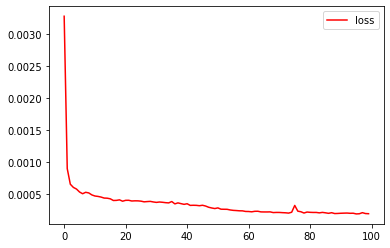

In [43]:
# 5. 학습과정 살펴보기
plt.plot(kl.history['loss'], c = 'r', label = 'loss')
plt.legend(loc = 'best')
plt.show()

#loss대신 score로 변경

In [44]:
# 6. 모델 평가
#trainScore = model.evaluate(x_train, y_train, verbose=0)
Loss, Acc = model.evaluate(x_train, y_train, verbose=0)

model.reset_states()
#print('Train Score: ', trainScore)
print('Train Score: ', Loss, Acc) 

#testScore = model.evaluate(x_test, y_test, verbose=0)
Loss_t, Acc_t = model.evaluate(x_test, y_test, verbose=0)
model.reset_states()
#print('Test Score: ', testScore)
print('Test Score: ', Loss_t, Acc_t)

Train Score:  0.00017485051648691297 0.09967990964651108
Test Score:  0.0008167902124114335 0.025371020659804344


In [45]:
# 7. 모델 사용 -- 바로 다음 값 예측
model_pred = model.predict(x_test)
model.reset_states()


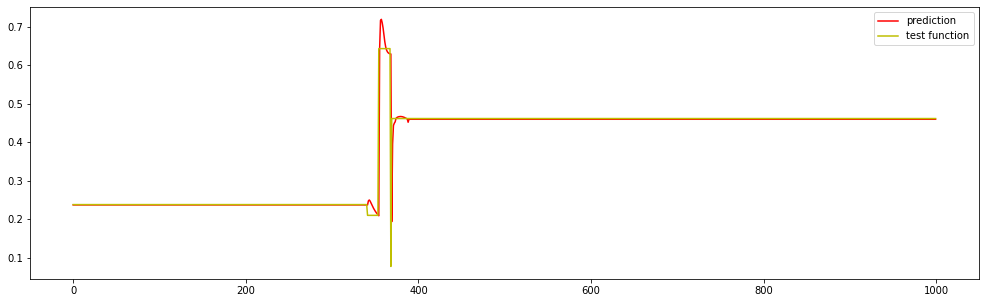

1310.2347911008737


In [46]:
plt.figure(figsize=(17,5))
plt.plot(model_pred[0 : 1000],'r',label="prediction")
plt.plot(y_test[0 : 1000], 'y', label="test function")
plt.legend()
plt.show()
model_error=np.sum((y_test-model_pred.T)**2)/len(y_test)
print(model_error)